# Random Forest Regressor
The Random Forest Regressor allows us to get a importance value of various properties. We ran this code first to use in feature selection, which then was used in various regression models.

We tested two different datasets: 1. With 0 solar generation values, 2. without 0 solar generation values. We expect the two datasets to yield different results.

This notebook involves importing the data, generating the model, and plotting the most important features.

The code was ran on Google Colaboratory, which is why there is a odd import of the dataset.

In [0]:
import pandas as pd
import numpy as np
from google.colab import drive
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [0]:
# Mounting the Google Drive locally. Allows me to access my own drives.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Importing the data
# The with0 data has 0 solar generation values.
with0_data = pd.read_csv('/content/drive/Shared drives/EnergyForecaster/Dataset/out_with_interpolation.csv')
with0_data.dropna(inplace=True)
with0_data.pop("Unnamed: 0")
with0_data

,Date,hhmm,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar
0,01/01/2013,00:00,0,0,0,0,0,0,4,17.0,171.19,0,0.143,1.2,4.701,215.9,100.00,17.0,1010.0,0.0,0.0,0.0,0.0
1,01/01/2013,00:30,0,0,0,0,0,0,4,17.0,173.12,0,0.143,1.0,4.717,215.9,100.00,17.0,1010.0,0.0,0.0,0.0,0.0
2,01/01/2013,01:00,0,0,0,0,0,0,4,17.0,169.65,0,0.143,0.8,4.734,264.1,100.00,17.0,1010.0,0.0,0.0,0.0,0.0
3,01/01/2013,01:30,0,0,0,0,0,0,4,17.0,163.97,0,0.143,1.2,4.707,264.1,100.00,17.0,1010.0,0.0,0.0,0.0,0.0
4,01/01/2013,02:00,0,0,0,0,0,0,4,17.0,157.73,0,0.143,1.6,4.681,324.3,100.00,17.0,1010.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90515,12/31/2018,21:30,0,0,0,0,0,0,8,0.1,140.49,0,0.140,3.7,1.100,181.0,78.08,3.6,1030.0,0.0,0.0,0.0,0.0
90516,12/31/2018,22:00,0,0,0,0,0,0,4,-0.4,147.00,0,0.140,3.8,1.100,360.0,77.05,3.2,1031.0,0.0,0.0,0.0,0.0
90517,12/31/2018,22:30,0,0,0,0,0,0,7,-0.4,153.47,0,0.140,3.9,1.100,180.0,78.70,2.9,1031.0,0.0,0.0,0.0,0.0
90518,12/31/2018,23:00,0,0,0,0,0,0,7,-1.1,159.86,0,0.140,4.0,1.100,0.0,76.42,2.6,1031.0,0.0,0.0,0.0,0.0


In [0]:
# Importing the data
# The no0 data has no 0 solar generation values.
no0_data = pd.read_csv('/content/drive/Shared drives/EnergyForecaster/Dataset/no_0_solar_with_interpolation.csv')
no0_data.dropna(inplace=True)
no0_data.pop("Unnamed: 0")
no0_data

,Date,hhmm,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Fill Flag,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,Solar,Normalized_Solar_lin,Normalized_Solar_geom,Normalized_Solar
0,01/01/2013,08:00,13,0,13,50,204,77,4,10.0,82.67,0,0.143,2.9,3.814,355.2,96.35,11.0,1010.0,0.000080,9.756098e-07,9.756098e-07,6.611570e-07
1,01/01/2013,08:30,65,0,65,81,356,160,8,10.0,77.27,0,0.143,3.0,3.741,355.2,96.38,11.0,1010.0,0.184486,2.249829e-03,2.249829e-03,1.524678e-03
2,01/01/2013,09:00,10,0,10,99,487,248,7,10.0,72.18,0,0.143,3.3,3.669,1.7,96.05,11.0,1010.0,0.472936,5.767512e-03,5.767512e-03,3.908562e-03
3,01/01/2013,09:30,14,0,14,114,566,331,8,10.0,67.46,4,0.143,3.3,3.601,1.7,96.08,11.0,1010.0,0.919004,1.120737e-02,1.120737e-02,7.595074e-03
4,01/01/2013,10:00,31,0,31,119,643,409,4,10.0,63.22,0,0.143,3.4,3.534,5.4,89.10,12.0,1010.0,1.363654,1.662993e-02,1.662993e-02,1.126987e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,12/31/2018,16:00,103,228,166,59,715,258,7,10.5,73.86,43,0.140,0.7,1.300,252.0,87.95,12.4,1012.0,278.939981,1.501292e-01,1.501292e-01,1.501292e-01
51465,12/31/2018,16:30,65,111,86,49,596,162,7,10.5,79.03,100,0.140,0.7,1.300,237.0,90.88,11.9,1012.0,245.728932,1.322545e-01,1.322545e-01,1.322545e-01
51466,12/31/2018,17:00,30,52,35,33,398,71,4,9.2,84.45,100,0.140,0.8,1.400,222.0,86.49,11.4,1013.0,151.002948,8.127177e-02,8.127177e-02,8.127177e-02
51467,12/31/2018,17:30,5,27,5,10,85,10,7,9.2,89.79,43,0.140,0.8,1.400,222.0,86.49,11.4,1013.0,50.007981,2.691495e-02,2.691495e-02,2.691495e-02


In [0]:
# Selecting all the relevant parameters for feature selection.
x_columns = ['DHI', 'DNI', 'GHI', 'Cloud Type', 'Dew Point', 
             'Solar Zenith Angle', 'Surface Albedo', 'Wind Speed', 
             'Wind Direction', 'Relative Humidity', 'Temperature', 'Pressure']
y_column = "Normalized_Solar_lin"

In [0]:
# Splitting the data
with0_x_train, with0_x_test, with0_y_train, with0_y_test= train_test_split(with0_data[x_columns], with0_data[y_column], test_size=0.33, random_state=42)

In [0]:
# Splitting the data
no0_x_train, no0_x_test, no0_y_train, no0_y_test= train_test_split(no0_data[x_columns], no0_data[y_column], test_size=0.33, random_state=42)

In [0]:
# The random forest regressor model
# Regressor is used instead of classifier due to the numerical nature of our properties
with0_forest = RandomForestRegressor(n_estimators = 100, random_state=42)
with0_forest.fit(with0_x_train, with0_y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [0]:
# The random forest regressor model
no0_forest = RandomForestRegressor(n_estimators = 100, random_state=42)
no0_forest.fit(no0_x_train, no0_y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

Feature ranking:
Solar Zenith Angle 1. feature 5 (0.563620)
Relative Humidity 2. feature 9 (0.120911)
GHI 3. feature 2 (0.068912)
Surface Albedo 4. feature 6 (0.046422)
Wind Direction 5. feature 8 (0.045339)
DHI 6. feature 0 (0.037573)
Temperature 7. feature 10 (0.029598)
Wind Speed 8. feature 7 (0.025124)
DNI 9. feature 1 (0.018709)
Dew Point 10. feature 4 (0.017416)
Pressure 11. feature 11 (0.016758)
Cloud Type 12. feature 3 (0.009620)


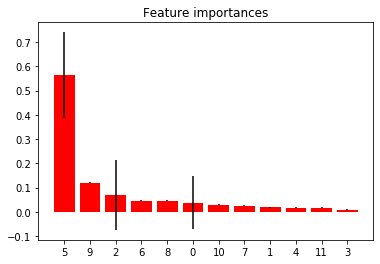

In [0]:
# Plotting the feature importance of our dataset
importances = with0_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in with0_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(with0_x_train.shape[1]):
    print(x_columns[indices[f]]+" %d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(with0_x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(with0_x_train.shape[1]), indices)
plt.xlim([-1, with0_x_train.shape[1]])
plt.show()

Feature ranking:
Relative Humidity 1. feature 9 (0.346642)
Solar Zenith Angle 2. feature 5 (0.149772)
GHI 3. feature 2 (0.090975)
Surface Albedo 4. feature 6 (0.083799)
Wind Direction 5. feature 8 (0.078191)
Temperature 6. feature 10 (0.052759)
Wind Speed 7. feature 7 (0.047079)
DNI 8. feature 1 (0.037362)
DHI 9. feature 0 (0.032601)
Dew Point 10. feature 4 (0.032295)
Pressure 11. feature 11 (0.031303)
Cloud Type 12. feature 3 (0.017221)


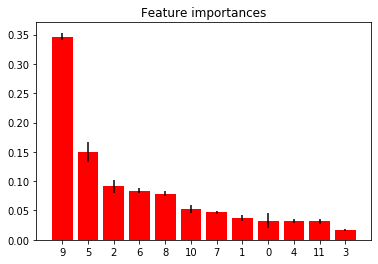

In [0]:
importances = no0_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in no0_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(no0_x_train.shape[1]):
    print(x_columns[indices[f]]+" %d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(no0_x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(no0_x_train.shape[1]), indices)
plt.xlim([-1, no0_x_train.shape[1]])
plt.show()

In [0]:
with0_forest.score(with0_x_test, with0_y_test)

0.8730787498785316

In [0]:
no0_forest.score(no0_x_test, no0_y_test)

0.7607907953166022

## Conclusion
There is difference between with0 and no0 datasets. 

First, there is a difference in feature rankings. The parameters that the model considers important is different. 

Second, the black lines, which represents the deviation of the parameters, are smaller in the no0 dataset. This is very significant since it represents that the model has confidence in choosing these variables as important.

Third, the score of the model is higher in the with0 model compared to no0 model, whic means that the with0 model was more successful in predicting the y values.

With these observations, we determined that the no0 model is more suitable for us to use in further regression models. This is largely due to the second observation, difference in deviation. Because lower deviation means more confidence in the feature importance, the no0 model is more reliable than the with0 model despite the lower score. Even the score of 0.76 is not too bad.